<a href="https://colab.research.google.com/github/aozdl/Naive-Bayes-Project/blob/main/Naive_Bayes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import r2_score, mean_absolute_percentage_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.linear_model import LogisticRegression

# Import Dataset

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
df = pd.read_csv(url)

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [4]:
df.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.isnull().sum()

,0
package_name,0
review,0
polarity,0


In [6]:
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [7]:
df.columns

Index(['package_name', 'review', 'polarity'], dtype='object')

In [8]:
df = df.drop(columns=['package_name'])

In [9]:
X = df['review']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
vec_model = CountVectorizer(stop_words="english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

# Naive Bayas Model

In [11]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
# Train and evaluate GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

In [13]:
accuracy_gnb

0.8044692737430168

In [14]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

In [15]:
model_blb = BernoulliNB()
model_blb.fit(X_train, y_train)

BernoulliNB()

In [16]:
 #BernoulliNB
 accuracy_bnb

0.770949720670391

In [17]:
model_mlb = MultinomialNB()
model_mlb.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Train and evaluate MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

In [19]:
#MultinomialNB
accuracy_mnb

0.8156424581005587

In [20]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_rf

0.7988826815642458

In [22]:
# Save the MultinomialNB model
joblib.dump(mnb, 'multinomial_nb_model.pkl')

['multinomial_nb_model.pkl']

In [23]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Exploring Other Alternatives

In [24]:
# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# GridSearch for Random Forest

In [25]:
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [26]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=2,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [27]:
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Best Random Forest CV Score: {best_score_rf}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest CV Score: 0.7851123595505618


In [28]:
best_rf_model = grid_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

print(f"Random Forest Test Accuracy: {accuracy_rf_best}")

Random Forest Test Accuracy: 0.8156424581005587


# GridSearch for Logistic Regression

In [29]:
param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['liblinear']}


grid_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                       param_grid=param_grid_lr,
                       cv=2,
                       n_jobs=-1)


grid_lr.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [30]:
best_params_lr = grid_lr.best_params_
best_score_lr = grid_lr.best_score_

print(f"Best Logistic Regression Parameters: {best_params_lr}")
print(f"Best Logistic Regression CV Score: {best_score_lr}")

Best Logistic Regression Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression CV Score: 0.7865168539325842


In [31]:
best_lr_model = grid_lr.best_estimator_
y_pred_lr_best = best_lr_model.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

print(f"Logistic Regression Test Accuracy: {accuracy_lr_best}")

Logistic Regression Test Accuracy: 0.8324022346368715


# Graph for Accuracy

In [32]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)

In [33]:
print(f"GaussianNB Accuracy: {accuracy_gnb}")
print(f"MultinomialNB Accuracy: {accuracy_mnb}")
print(f"BernoulliNB Accuracy: {accuracy_bnb}")
print(f"Random Forest Accuracy: {accuracy_rf_best}")
print(f"Logistic Regression Accuracy: {accuracy_lr_best}")

GaussianNB Accuracy: 0.8044692737430168
MultinomialNB Accuracy: 0.8156424581005587
BernoulliNB Accuracy: 0.770949720670391
Random Forest Accuracy: 0.8156424581005587
Logistic Regression Accuracy: 0.8324022346368715


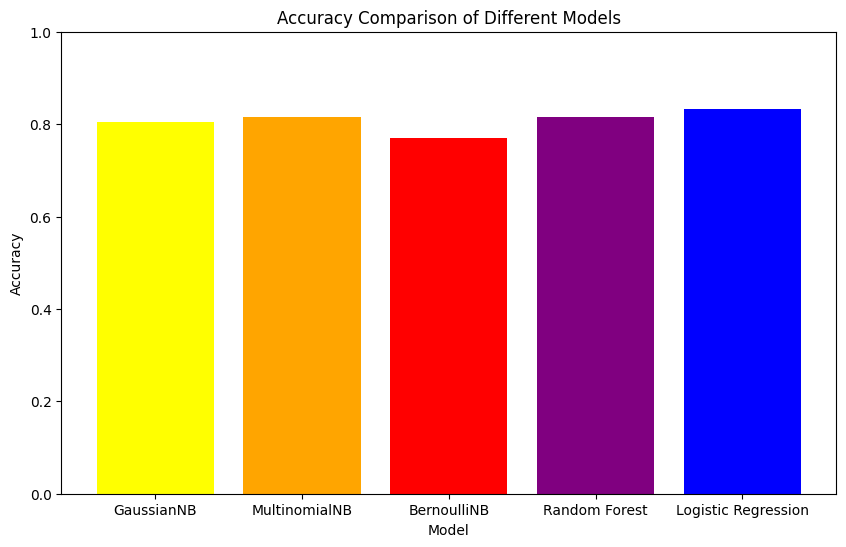

In [38]:
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_gnb, accuracy_mnb, accuracy_bnb, accuracy_rf_best, accuracy_lr_best]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['yellow', 'orange', 'red', 'purple', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.show()

In [39]:
# Save the models
joblib.dump(mnb, 'multinomial_nb_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']